In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FDM Data Set - Telecommunication/Hotel Reservations.csv')

In [ ]:
# Show data
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# prompt: display the unique values of these columns. room type,meal plan,market segment, car paking space,repeated guest

columns_to_check = ['room_type_reserved', 'type_of_meal_plan', 'market_segment_type', 'required_car_parking_space', 'repeated_guest']

for column in columns_to_check:
  print(f"Unique values for {column}: {data[column].unique()}")


Unique values for room_type_reserved: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Unique values for type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Unique values for market_segment_type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique values for required_car_parking_space: [0 1]
Unique values for repeated_guest: [0 1]


In [ ]:
# Descriptive statistic on dataset on numerical columns
data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'required_car_parking_space', 'lead_time',
    'arrival_year', 'arrival_month', 'arrival_date',
    'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
# prompt: check for duplicate values in this datset

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
if not duplicate_rows.empty:
  print("Duplicate rows:\n", duplicate_rows)


Number of duplicate rows: 0


In [ ]:
data = data.drop('Booking_ID', axis=1)

In [ ]:
# Dictionaries to store encoding and decoding maps
encoding_maps = {}
decoding_maps = {}

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

    # Create encoding map
    encoding_map = {original: encoded for original, encoded in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))}
    encoding_maps[column] = encoding_map

    # Create decoding map
    decoding_map = {encoded: original for original, encoded in encoding_map.items()}
    decoding_maps[column] = decoding_map

In [ ]:
# Print the encoding and decoding maps
print("Encoding Maps:")
encoding_maps
print("\nDecoding Maps:")
decoding_maps

Encoding Maps:

Decoding Maps:


{'type_of_meal_plan': {0: 'Meal Plan 1',
  1: 'Meal Plan 2',
  2: 'Meal Plan 3',
  3: 'Not Selected'},
 'room_type_reserved': {0: 'Room_Type 1',
  1: 'Room_Type 2',
  2: 'Room_Type 3',
  3: 'Room_Type 4',
  4: 'Room_Type 5',
  5: 'Room_Type 6',
  6: 'Room_Type 7'},
 'market_segment_type': {0: 'Aviation',
  1: 'Complementary',
  2: 'Corporate',
  3: 'Offline',
  4: 'Online'},
 'booking_status': {0: 'Canceled', 1: 'Not_Canceled'}}

In [ ]:
# prompt: check for null values in this data set and print the number of null values in each column

# Check for null values
null_counts = data.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
# Define columns for normalization
normalize_columns = ['lead_time', 'avg_price_per_room']

# Define columns for standardization
standardize_columns = ['no_of_week_nights', 'no_of_weekend_nights',
                       'no_of_previous_bookings_not_canceled', 'no_of_special_requests']

# Apply normalization
min_max_scaler = MinMaxScaler()
data[normalize_columns] = min_max_scaler.fit_transform(data[normalize_columns])

# Apply standardization
standard_scaler = StandardScaler()
data[standardize_columns] = standard_scaler.fit_transform(data[standardize_columns])

In [ ]:
# Check the range of normalized columns
print("Range of normalized columns:")
print(data[['lead_time', 'avg_price_per_room']].min())
print(data[['lead_time', 'avg_price_per_room']].max())

Range of normalized columns:
lead_time             0.0
avg_price_per_room    0.0
dtype: float64
lead_time             1.0
avg_price_per_room    1.0
dtype: float64


In [ ]:
# Check the mean and standard deviation of standardized columns
print("Mean and Standard Deviation of standardized columns:")
print(data[['no_of_week_nights', 'no_of_weekend_nights',
        'no_of_previous_bookings_not_canceled', 'no_of_special_requests']].mean())
print(data[['no_of_week_nights', 'no_of_weekend_nights',
        'no_of_previous_bookings_not_canceled', 'no_of_special_requests']].std())

Mean and Standard Deviation of standardized columns:
no_of_week_nights                      -1.165466e-16
no_of_weekend_nights                    9.950536e-17
no_of_previous_bookings_not_canceled   -3.094852e-17
no_of_special_requests                  1.664952e-17
dtype: float64
no_of_week_nights                       1.000014
no_of_weekend_nights                    1.000014
no_of_previous_bookings_not_canceled    1.000014
no_of_special_requests                  1.000014
dtype: float64


In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

                                      no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
type_of_meal_plan                         0.025555       -0.086764   
required_car_parking_space                0.011429        0.034244   
room_type_reserved                        0.270348        0.364073   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
market_segment_type                       0.314103        0.130618   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cance

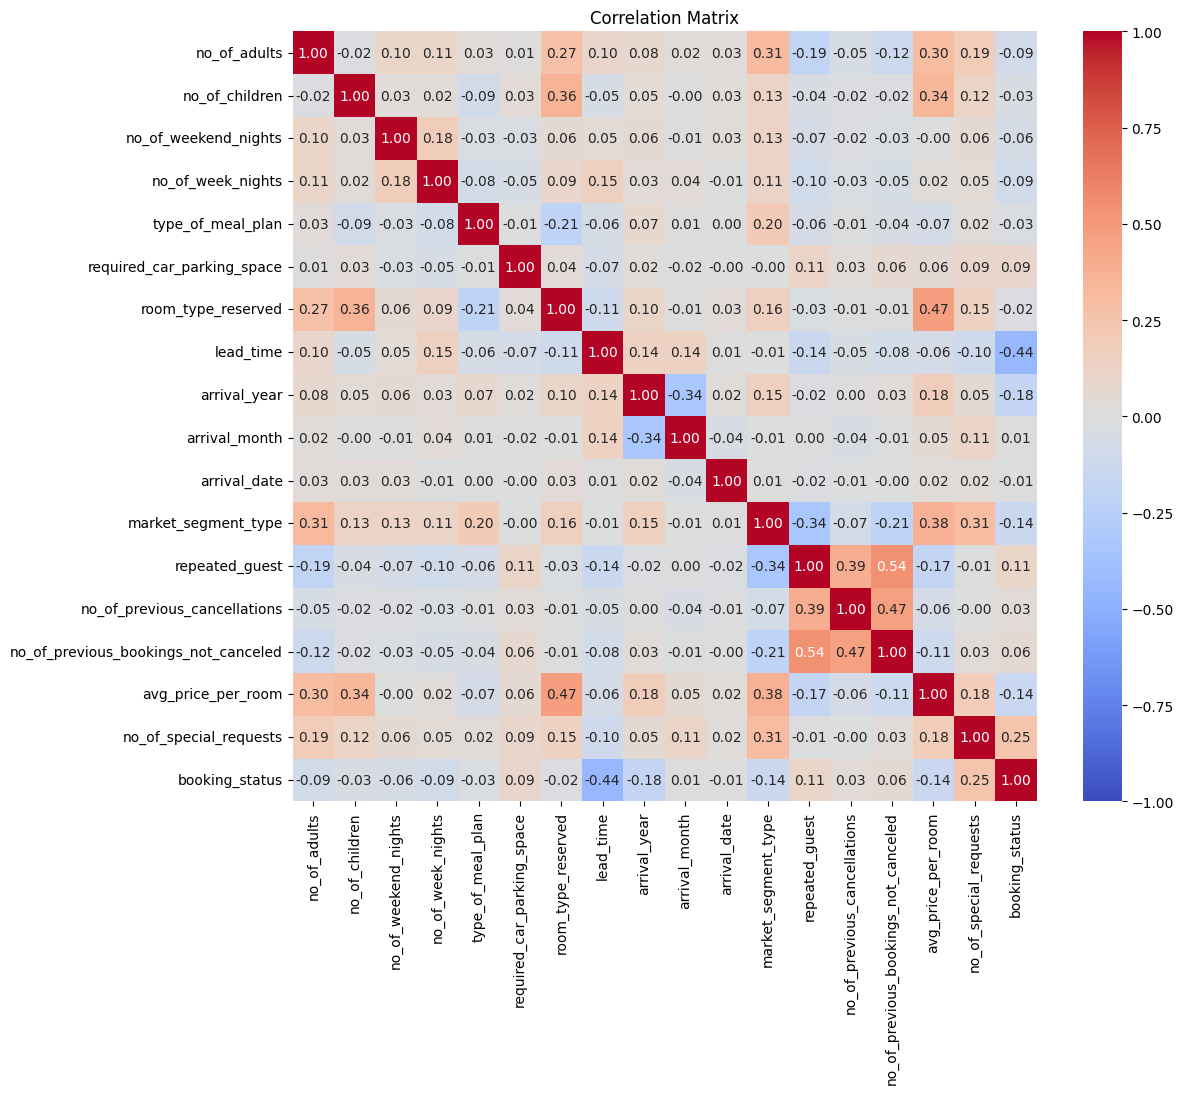

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
print(data.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [ ]:
# Define features and target
X = data.drop(columns=['booking_status'])
y = data['booking_status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

print(X.dtypes)

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                               float64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
dtype: object


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# 2. Train the model on the training data
clf.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = clf.predict(X_test)

clf.fit(X_train, y_train)

# 4. Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 87.07%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2416
           1       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255

Confusion Matrix:
[[1970  446]
 [ 492 4347]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],            # Experiment with different depths or no depth limit
    'min_samples_split': [2, 10, 20],              # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],                # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']               # Gini Impurity or Information Gain (Entropy)
}

# Initialize the Decision Tree Classifier
clf_best = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score * 100:.2f}%")

# Train a new Decision Tree with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions and evaluate the final model
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best params: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 87.46%
Test Accuracy with best params: 87.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2416
           1       0.90      0.91      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.87      0.88      0.88      7255

Confusion Matrix:
[[1942  474]
 [ 430 4409]]


In [ ]:
import joblib

# Save the best model
joblib.dump(best_clf, 'decision_tree_model.pkl')
print("Model saved as decision_tree_model.pkl")


Model saved as decision_tree_model.pkl


In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
import joblib

# Load the saved model
model = joblib.load('decision_tree_model.pkl')

# Define function to make predictions
def predict_booking(features):
    prediction = model.predict([features])
    return 'Canceled' if prediction == 1 else 'Not Canceled'

# Streamlit app interface
st.title("Hotel Booking Cancellation Prediction")

# Input fields for user to enter feature values
no_of_adults = st.number_input("Number of Adults", min_value=0, max_value=10, value=0)
no_of_children = st.number_input("Number of Children", min_value=0, max_value=10, value=0)
no_of_weekend_nights = st.number_input("Number of Weekend Nights", min_value=0, max_value=7, value=0)
no_of_week_nights = st.number_input("Number of Week Nights", min_value=0, max_value=7, value=0)
lead_time = st.number_input("Lead Time (days)", min_value=0, max_value=365, value=0)
arrival_year = st.number_input("Arrival Year", min_value=2021, max_value=2025, value=2024)
arrival_month = st.number_input("Arrival Month", min_value=1, max_value=12, value=9)
arrival_date = st.number_input("Arrival Date", min_value=1, max_value=31, value=1)
no_of_previous_cancellations = st.number_input("Number of Previous Cancellations", min_value=0, max_value=10, value=0)
no_of_previous_bookings_not_canceled = st.number_input("Number of Previous Bookings Not Canceled", min_value=0, max_value=10, value=0)
avg_price_per_room = st.number_input("Average Price per Room", min_value=0.0, max_value=1000.0, value=0.0)
no_of_special_requests = st.number_input("Number of Special Requests", min_value=0, max_value=5, value=0)
required_car_parking_space = st.selectbox("Required Car Parking Space", ["Yes", "No"])
required_car_parking_space_value = 1 if required_car_parking_space == "Yes" else 0
repeated_guest = st.selectbox("Repeated Guest", ["Yes", "No"])
repeated_guest_value = 1 if repeated_guest == "Yes" else 0

# Categorical features: encode based on how the model was trained
room_type_reserved = st.selectbox("Room Type Reserved", ['Room_Type_1', 'Room_Type_2', 'Room_Type_3', 'Room_Type_4', 'Room_Type_5', 'Room_Type_6', 'Room_Type_7'])
type_of_meal_plan = st.selectbox("Meal Plan", ['Not_Selected', 'Meal_Plan_1', 'Meal_Plan_2', 'Meal_Plan_3'])
market_segment_type = st.selectbox("Market Segment", ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'])

# Manually encode these features as per training
room_type_dict = {'Room_Type_1': 0, 'Room_Type_2': 1, 'Room_Type_3': 2,  'Room_Type_4':3, 'Room_Type_5':4, 'Room_Type_6':5, 'Room_Type_7':6}
meal_plan_dict = {'Not_Selected':0, 'Meal_Plan_1':1, 'Meal_Plan_2':2, 'Meal_Plan_3':3}
market_segment_dict = {'Offline': 0, 'Online': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4}

# Create a dictionary of inputs for prediction
inputs = {
    'no_of_adults': no_of_adults,
    'no_of_children': no_of_children,
    'no_of_weekend_nights': no_of_weekend_nights,
    'no_of_week_nights': no_of_week_nights,
    'lead_time': lead_time,
    'arrival_year': arrival_year,
    'arrival_month': arrival_month,
    'arrival_date': arrival_date,
    'no_of_previous_cancellations': no_of_previous_cancellations,
    'no_of_previous_bookings_not_canceled': no_of_previous_bookings_not_canceled,
    'avg_price_per_room': avg_price_per_room,
    'no_of_special_requests': no_of_special_requests,
    'required_car_parking_space': required_car_parking_space_value,  # Use encoded value here
    'repeated_guest': repeated_guest_value,  # Use encoded value here
    'room_type_reserved': room_type_dict[room_type_reserved],
    'type_of_meal_plan': meal_plan_dict[type_of_meal_plan],
    'market_segment_type': market_segment_dict[market_segment_type]
}

# Combine all features for prediction
features = [
    no_of_adults,
    no_of_children,
    no_of_weekend_nights,
    no_of_week_nights,
    lead_time,
    arrival_year,
    arrival_month,
    arrival_date,
    no_of_previous_cancellations,
    no_of_previous_bookings_not_canceled,
    avg_price_per_room,
    no_of_special_requests,
    required_car_parking_space_value,  # Corrected to pass the encoded value
    repeated_guest_value,  # Corrected to pass the encoded value
    room_type_dict[room_type_reserved],  # Encoded value of Room Type
    meal_plan_dict[type_of_meal_plan],   # Encoded value of Meal Plan
    market_segment_dict[market_segment_type]  # Encoded value of Market Segment
]

# Display prediction button
if st.button('Predict Booking Cancellation'):
    result = predict_booking(features)
    st.success(f"The booking is predicted to be: {result}")


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Start the Streamlit app
!streamlit run app.py &

# Expose the app using ngrok
public_url = ngrok.connect(port='8501')
print(f"Public URL: {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.226.49.253:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2024-09-25T14:19:18+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-09-25T14:19:18+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-09-25T14:19:18+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.